In [1]:
import os,sys
import matplotlib.pylab as plt
import pickle
import glob
import numpy as np
import matplotlib as mpl
import pandas as pd
mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi']=300
import pickle
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
# print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *

### Why do we need a better way to visualize the gene set enrichment analysis result?

## Visualization of KEGG Pathway enrichment

In [2]:
data=pd.read_csv(os.path.expanduser("~/Downloads/test.tsv"),sep='\t',index_col=0)
data.head()

,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,mc_type,Group,Parent,CellType,DisplayTerm,Category,Direction,Ratio,-log10(FDR)
1179,KEGG_2021_Human__Dopaminergic synapse,0.693880,2.241275,0.0,0.000000,0.000,40/132,7.75%,ADCY5;PPP1R1B;PPP2R2A;GNAO1;GNG7;PPP2R2C;GNG5;...,CG,Group,STR_Hybrid_MSN,STRv D1 NUDAP MSN,Dopaminergic synapse,KEGG_Pathway,Hyper,0.303030,26.000000
2002,KEGG_2021_Human__Adrenergic signaling in cardi...,0.660937,2.140223,0.0,0.000280,0.001,35/149,7.72%,ADCY5;ATP2B1;PPP2R2A;SCN4B;ATP2B2;PPP1R1A;PPP2...,CG,Group,STR_Hybrid_MSN,STRv D1 NUDAP MSN,Adrenergic signaling in cardiomyocytes,KEGG_Pathway,Hyper,0.234899,3.552289
2028,KEGG_2021_Human__Circadian entrainment,0.686241,2.137466,0.0,0.000224,0.001,39/97,11.16%,ADCY5;CACNA1H;GNAO1;GRIN1;CACNA1I;GNG7;RASD1;G...,CG,Group,STR_Hybrid_MSN,STRv D1 NUDAP MSN,Circadian entrainment,KEGG_Pathway,Hyper,0.402062,3.649199
2150,KEGG_2021_Human__Amphetamine addiction,0.706639,2.127276,0.0,0.000374,0.002,21/69,8.98%,ADCY5;PPP1R1B;ARC;GRIN1;PPP3CA;GRIN2A;CALM2;CA...,CG,Group,STR_Hybrid_MSN,STRv D1 NUDAP MSN,Amphetamine addiction,KEGG_Pathway,Hyper,0.304348,3.427350
2584,KEGG_2021_Human__Long-term potentiation,0.700588,2.092744,0.0,0.001744,0.011,27/67,11.16%,GRIN1;PPP1R1A;PPP3CA;PLCB1;GRIN2A;RPS6KA2;CALM...,CG,Group,STR_Hybrid_MSN,STRv D1 NUDAP MSN,Long-term potentiation,KEGG_Pathway,Hyper,0.402985,2.758344


Starting..
Calculating row orders..
Reordering rows..
Calculating col orders..
Reordering cols..
Plotting matrix..
Using user provided max_s: 120
120 12.0 0.4029850746268656 0.2348993288590604
{'0.4': 10.954451150103322, '0.36': 9.812171195475347, '0.32': 8.669891240847372, '0.28': 7.527611286219398, '0.23': 6.385331331591423}
Plotting legends..


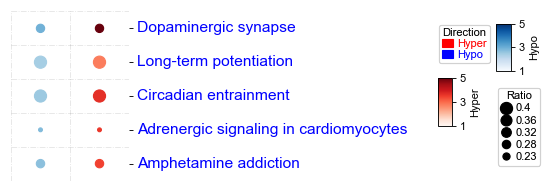

In [6]:
plt.figure(figsize=(2, 2.5))
cm = DotClustermapPlotter(data=data, x='CellType',y='DisplayTerm',value='-log10(FDR)',c='-log10(FDR)',s='Ratio',
                          row_cluster=True,col_cluster=False,hue='Direction',
                          cmap={'Hyper':'Reds','Hypo':'Blues'},
                          colors={'Hyper':'red','Hypo':'blue'},
                          vmin=1,vmax=5,#alpha=0.5,
                          # marker={'EnrPval':'P','DepPval':'X'},
                          show_rownames=True,show_colnames=False,row_dendrogram=False,
                          col_names_side='top',#row_names_side='right',
                          yticklabels_kws={'labelrotation': 0, 'labelcolor': 'blue','labelsize':14,'right':True,},
                          spines=False,max_s=120,
                          #col_split=df_cols.Neighborhood,col_split_gap=0.5,col_split_order=df_cols.Neighborhood.unique().tolist(),
                          verbose=1,legend_gap=5,legend_width=20,legend_anchor='ax',
                          dot_legend_kws=dict(labelspacing=0.2),
                         )
plt.savefig("test.pdf",transparent=True,bbox_inches='tight',dpi=300)
plt.show()

In [4]:
data

,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,mc_type,Group,Parent,CellType,DisplayTerm,Category,Direction,Ratio,-log10(FDR)
1179,KEGG_2021_Human__Dopaminergic synapse,0.693880,2.241275,0.0,0.000000,0.000,40/132,7.75%,ADCY5;PPP1R1B;PPP2R2A;GNAO1;GNG7;PPP2R2C;GNG5;...,CG,Group,STR_Hybrid_MSN,STRv D1 NUDAP MSN,Dopaminergic synapse,KEGG_Pathway,Hyper,0.303030,26.000000
2002,KEGG_2021_Human__Adrenergic signaling in cardi...,0.660937,2.140223,0.0,0.000280,0.001,35/149,7.72%,ADCY5;ATP2B1;PPP2R2A;SCN4B;ATP2B2;PPP1R1A;PPP2...,CG,Group,STR_Hybrid_MSN,STRv D1 NUDAP MSN,Adrenergic signaling in cardiomyocytes,KEGG_Pathway,Hyper,0.234899,3.552289
2028,KEGG_2021_Human__Circadian entrainment,0.686241,2.137466,0.0,0.000224,0.001,39/97,11.16%,ADCY5;CACNA1H;GNAO1;GRIN1;CACNA1I;GNG7;RASD1;G...,CG,Group,STR_Hybrid_MSN,STRv D1 NUDAP MSN,Circadian entrainment,KEGG_Pathway,Hyper,0.402062,3.649199
2150,KEGG_2021_Human__Amphetamine addiction,0.706639,2.127276,0.0,0.000374,0.002,21/69,8.98%,ADCY5;PPP1R1B;ARC;GRIN1;PPP3CA;GRIN2A;CALM2;CA...,CG,Group,STR_Hybrid_MSN,STRv D1 NUDAP MSN,Amphetamine addiction,KEGG_Pathway,Hyper,0.304348,3.427350
2584,KEGG_2021_Human__Long-term potentiation,0.700588,2.092744,0.0,0.001744,0.011,27/67,11.16%,GRIN1;PPP1R1A;PPP3CA;PLCB1;GRIN2A;RPS6KA2;CALM...,CG,Group,STR_Hybrid_MSN,STRv D1 NUDAP MSN,Long-term potentiation,KEGG_Pathway,Hyper,0.402985,2.758344
716810,KEGG_2021_Human__Long-term potentiation,-0.700588,-2.066172,0.0,0.003924,0.030,27/67,11.16%,GRIN1;PPP1R1A;PPP3CA;PLCB1;GRIN2A;RPS6KA2;CALM...,CG,Group,STR_Hybrid_MSN,STR D1D2 Hybrid MSN,Long-term potentiation,KEGG_Pathway,Hypo,0.402985,2.406235
717037,KEGG_2021_Human__Circadian entrainment,-0.686241,-2.082763,0.0,0.002990,0.021,39/97,11.16%,ADCY5;CACNA1H;GNAO1;GRIN1;CACNA1I;GNG7;RASD1;G...,CG,Group,STR_Hybrid_MSN,STR D1D2 Hybrid MSN,Circadian entrainment,KEGG_Pathway,Hypo,0.402062,2.524335
717341,KEGG_2021_Human__Amphetamine addiction,-0.706639,-2.106685,0.0,0.002082,0.012,21/69,8.98%,ADCY5;PPP1R1B;ARC;GRIN1;PPP3CA;GRIN2A;CALM2;CA...,CG,Group,STR_Hybrid_MSN,STR D1D2 Hybrid MSN,Amphetamine addiction,KEGG_Pathway,Hypo,0.304348,2.681458
717432,KEGG_2021_Human__Adrenergic signaling in cardi...,-0.660937,-2.115945,0.0,0.001682,0.008,35/149,7.72%,ADCY5;ATP2B1;PPP2R2A;SCN4B;ATP2B2;PPP1R1A;PPP2...,CG,Group,STR_Hybrid_MSN,STR D1D2 Hybrid MSN,Adrenergic signaling in cardiomyocytes,KEGG_Pathway,Hypo,0.234899,2.774212
718074,KEGG_2021_Human__Dopaminergic synapse,-0.693880,-2.211092,0.0,0.001121,0.001,40/132,7.75%,ADCY5;PPP1R1B;PPP2R2A;GNAO1;GNG7;PPP2R2C;GNG5;...,CG,Group,STR_Hybrid_MSN,STR D1D2 Hybrid MSN,Dopaminergic synapse,KEGG_Pathway,Hypo,0.303030,2.950303


In [5]:
cm.kwargs['s']

CellType,STR D1D2 Hybrid MSN,STRv D1 NUDAP MSN
DisplayTerm,,
Adrenergic signaling in cardiomyocytes,0.000000,0.000000
Amphetamine addiction,0.413173,0.413173
Circadian entrainment,0.994507,0.994507
Dopaminergic synapse,0.405335,0.405335
Long-term potentiation,1.000000,1.000000
